In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump, load


# 加载数据集
# 训练集
train_set = load('train_set')
train_label = load('train_label')
# 测试集
test_set = load('test_set')
test_label = load('test_label')

In [2]:
# 构建随机森林模型并进行训练：
# 构建随机森林 预测模型

# 设置参数
params = {
    'n_estimators': 200,  # 设置树的棵树
    'max_depth': 4,  # 设置树的深度
    'min_samples_leaf': 2 # 设置树的最小叶子树
}


model = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], min_samples_leaf=params['min_samples_leaf'])

# 模型训练
model.fit(train_set, train_label)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=200)

In [3]:
# 模型评估

from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import accuracy_score,classification_report # 引入准确度评分函数

# 随机森林 分类模型  

# 进行预测并评估模型性能：
# 进行预测
y_pred = model.predict(test_set)

score = r2_score(test_label, y_pred)
print('*'*50)
print(' 随机森林 模型分数--R^2:', score)


print('*'*50)
# 模型 评估
print("训练集准确率: %.3f" % accuracy_score(train_label, model.predict(train_set)))
print("测试集准确率: %.3f" % accuracy_score(test_label, y_pred))
print("测试集结果评估报告为：\n",classification_report(test_label,y_pred))

**************************************************
 随机森林 模型分数--R^2: 0.9728117892664381
**************************************************
训练集准确率: 0.995
测试集准确率: 0.990
测试集结果评估报告为：
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        72
         1.0       0.97      1.00      0.99        69
         2.0       0.99      1.00      0.99        72
         3.0       1.00      1.00      1.00        63
         4.0       1.00      1.00      1.00        71
         5.0       0.95      1.00      0.98        63
         6.0       1.00      0.98      0.99        65
         7.0       1.00      1.00      1.00        67
         8.0       0.99      0.92      0.95        75
         9.0       1.00      1.00      1.00        82

    accuracy                           0.99       699
   macro avg       0.99      0.99      0.99       699
weighted avg       0.99      0.99      0.99       699



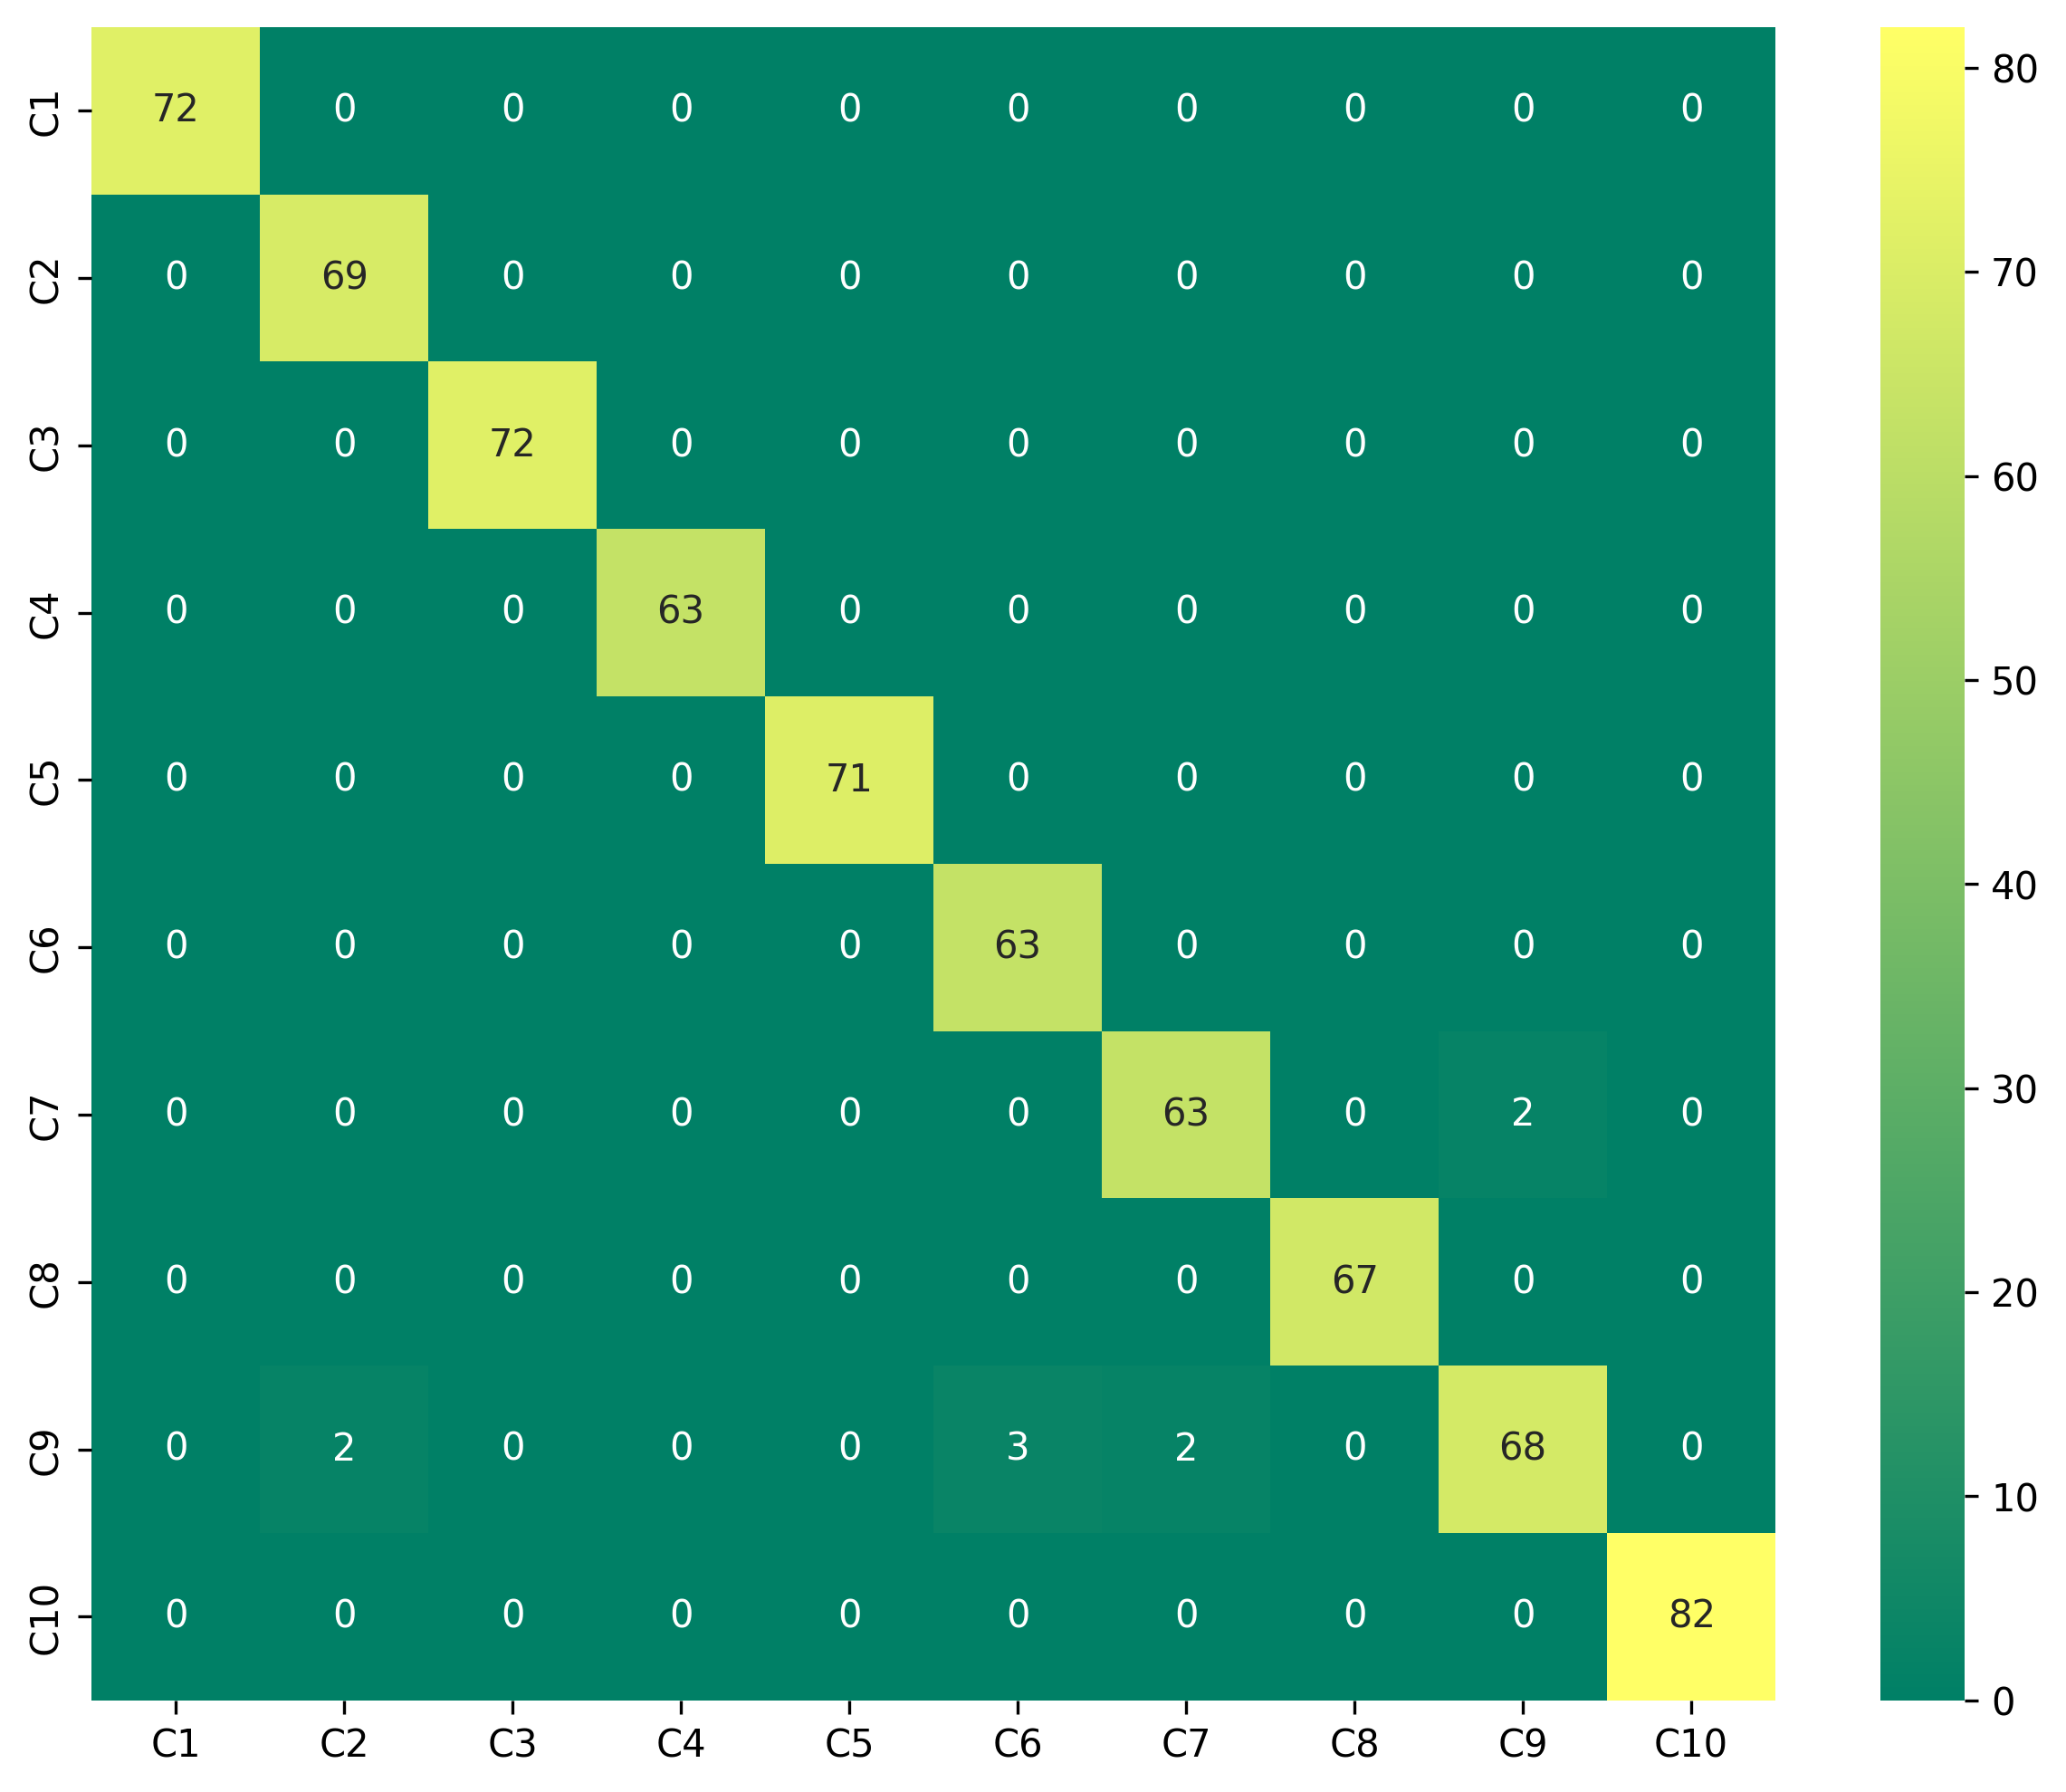

In [4]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
import matplotlib.ticker as ticker
# 绘制混淆矩阵
import matplotlib.pyplot as plt
import seaborn as sns
# 原始标签和自定义标签的映射
label_mapping = {
    0: "C1",1: "C2",2: "C3",3: "C4",4: "C5",
    5: "C6",6: "C7",7: "C8",8: "C9",9: "C10",
}

# 混淆矩阵
confusion_mat = confusion_matrix(test_label, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 8), dpi=300)
sns.heatmap(confusion_mat,  xticklabels=label_mapping.values(), yticklabels=label_mapping.values(),annot=True, fmt='d', cmap='summer')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
plt.show()

e:\Anaconda\anaconda\envs\deeplearning\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


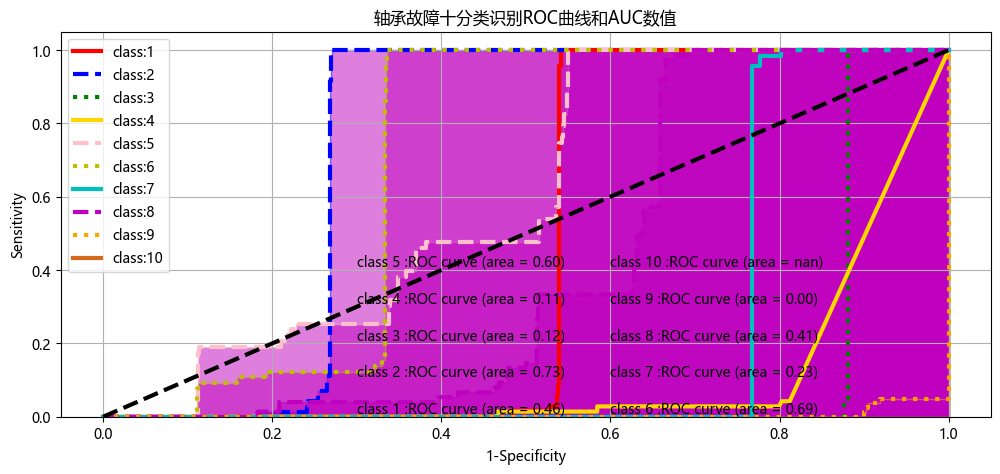

In [9]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

df = pd.DataFrame()
pre_score = model.predict_proba(test_set)
df['y_test'] = test_label.tolist()

df['pre_score1'] = pre_score[:,0]
df['pre_score2'] = pre_score[:,1]
df['pre_score3'] = pre_score[:,2]
df['pre_score4'] = pre_score[:,3]
df['pre_score5'] = pre_score[:,4]
df['pre_score6'] = pre_score[:,5]
df['pre_score7'] = pre_score[:,6]
df['pre_score8'] = pre_score[:,7]
df['pre_score9'] = pre_score[:,8]
df['pre_score10'] = pre_score[:,9]

pre1 = df['pre_score1']
pre1 = np.array(pre1)

pre2 = df['pre_score2']
pre2 = np.array(pre2)

pre3 = df['pre_score3']
pre3 = np.array(pre3)

pre4 = df['pre_score4']
pre4 = np.array(pre4)

pre5 = df['pre_score5']
pre5 = np.array(pre5)

pre6 = df['pre_score6']
pre6 = np.array(pre6)

pre7 = df['pre_score7']
pre7 = np.array(pre7)

pre8 = df['pre_score8']
pre8 = np.array(pre8)

pre9 = df['pre_score9']
pre9 = np.array(pre9)

pre10 = df['pre_score10']
pre10 = np.array(pre10)


y_list = df['y_test'].to_list()
pre_list=[pre1,pre2,pre3,pre4,pre5,pre6,pre7,pre8,pre9,pre10]

lable_names=['1','2','3','4','5','6','7','8','9','10']
colors1 = ["r","b","g",'gold','pink','y','c','m','orange','chocolate']
colors2 = "mistyrose"# "mistyrose","skyblue","palegreen"
my_list = []
linestyles =["-", "--", ":","-", "--", ":","-", "--", ":","-"]


plt.figure(figsize=(12,5),facecolor='w')
for i in range(10):
    roc_auc = 0
     #添加文本信息
    if i==0:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=1)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.3, 0.01, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    elif i==1:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=2)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.3, 0.11, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    elif i==2:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=3)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.3, 0.21, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    elif i==3:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=4)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.3, 0.31, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    elif i==4:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=5)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.3, 0.41, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    elif i==5:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=6)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.6, 0.01, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    elif i==6:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=7)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.6, 0.11, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    elif i==7:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=8)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.6, 0.21, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    elif i==8:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=9)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.6, 0.31, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    elif i==9:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=10)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.6, 0.41, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    my_list.append(roc_auc)
    # 添加ROC曲线的轮廓
    plt.plot(fpr, tpr, color = colors1[i],linestyle = linestyles[i],linewidth = 3,
             label = "class:"+lable_names[i])  #  lw = 1,
    #绘制面积图
    plt.stackplot(fpr, tpr, colors=colors2, alpha = 0.5,edgecolor = colors1[i]) #  alpha = 0.5,
   
# 添加对角线
plt.plot([0, 1], [0, 1], color = 'black', linestyle = '--',linewidth = 3)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.grid()
plt.legend()
plt.title("轴承故障十分类识别ROC曲线和AUC数值")
plt.show()